In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.preprocessing import image
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import MaxPool2D,Conv2D,Dense,Dropout,Flatten

from sklearn.metrics import classification_report,confusion_matrix

In [8]:
train_df = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [9]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [10]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


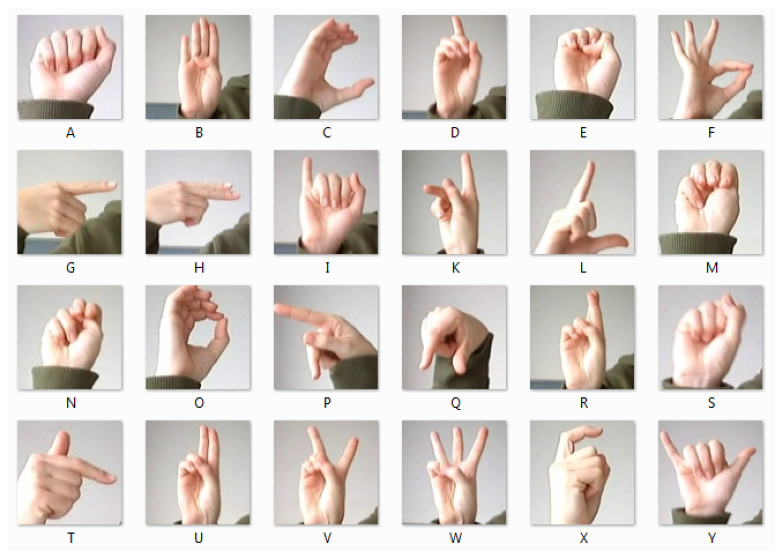

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(Image.open('../input/sign-language-mnist/amer_sign2.png'))
plt.axis('off');

In [12]:
alp = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

pred_class = []
for i in alp:
    pred_class.append(i)

pred_class

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

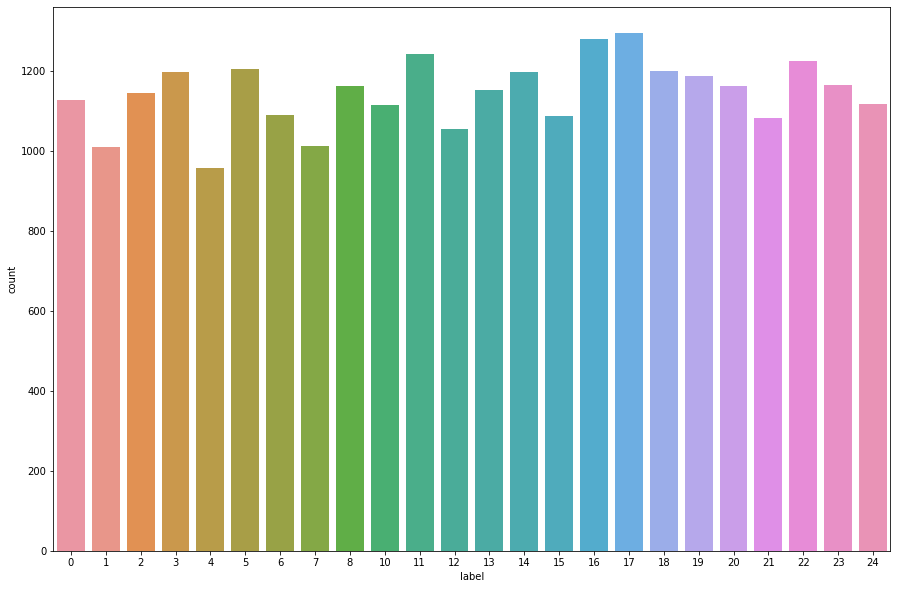

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_df,x='label');

In [14]:
y_train = train_df['label']
x_train = train_df.drop(columns=['label'])

y_test = test_df['label']
x_test = test_df.drop(columns=['label'])

print(x_train.shape,y_train.shape)

(27455, 784) (27455,)


In [15]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [16]:
x_train.shape[0]

27455

In [17]:
x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)

print(x_train.shape,x_test.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


**Image Data Generator**

In [18]:
traingen = Imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                zoom_range=0.2,
                 shear_range=0.2,
                 brightness_range=[0.85,1.20],
                 rotation_range=20,
                 validation_split=0.15
                )
testgen = Imgen(preprocessing_function=keras.applications.xception.preprocess_input)

In [19]:
train_ds = traingen.flow(x_train,y_train,
                        batch_size = 32,
                        subset='training'
                        )

val_ds = traingen.flow(x_train,y_train,
                        batch_size = 32,
                        subset='validation'
                        )

test_ds = testgen.flow(x_test,y_test,
                       batch_size = 32,
                       shuffle = False
                      )

In [20]:
x,y = next(train_ds)

In [21]:
#plot function
def plot_images(images_arr,labels):
    plt.figure(figsize=(15,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images_arr[i])
        plt.title(pred_class[(labels[i])])
        plt.axis('off')

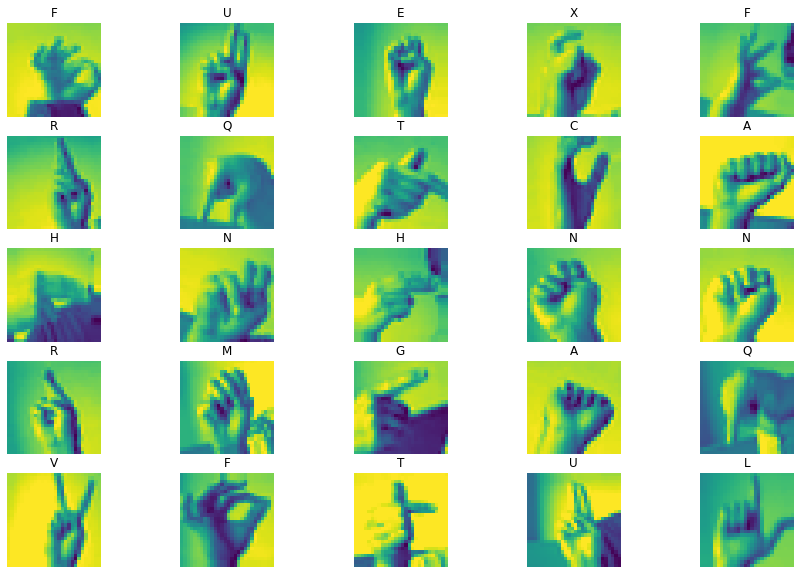

In [22]:
plot_images(x,y)

**Model**

In [29]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D(2,2),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2,2),
    
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D(2,2),
    
    Flatten(),
    
    Dense(128,activation='relu'),
    Dropout(0.5),
    
    Dense(64,activation='relu'),
    Dropout(0.5),
    
    Dense(25,activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         36992     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [31]:
#compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

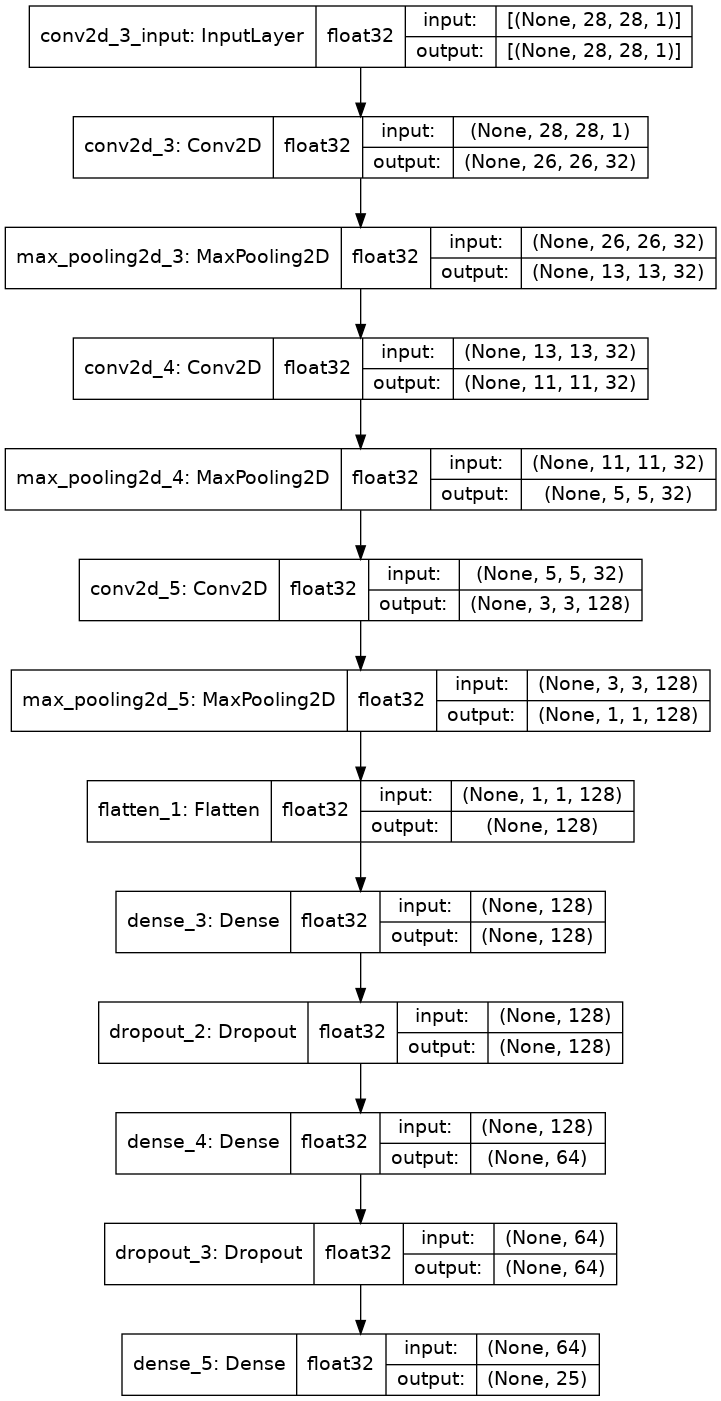

In [32]:
keras.utils.plot_model(model,
                      show_shapes=True,
                      show_dtype=True,
                      show_layer_names=True)

In [33]:
#callbacks
my_calls = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
            keras.callbacks.ModelCheckpoint("Model.h5",verbose=1,save_best_only=True)]

**Train**

In [34]:
hist = model.fit(train_ds, epochs=17, validation_data=val_ds, callbacks=my_calls)

Epoch 1/17
730/730 [==============================] - 14s 18ms/step - loss: 2.7388 - accuracy: 0.1608 - val_loss: 0.9389 - val_accuracy: 0.6991

Epoch 00001: val_loss improved from inf to 0.93890, saving model to Model.h5
Epoch 2/17
730/730 [==============================] - 13s 17ms/step - loss: 1.1241 - accuracy: 0.6030 - val_loss: 0.4608 - val_accuracy: 0.8453

Epoch 00002: val_loss improved from 0.93890 to 0.46077, saving model to Model.h5
Epoch 3/17
730/730 [==============================] - 13s 18ms/step - loss: 0.6525 - accuracy: 0.7653 - val_loss: 0.2418 - val_accuracy: 0.9218

Epoch 00003: val_loss improved from 0.46077 to 0.24180, saving model to Model.h5
Epoch 4/17
730/730 [==============================] - 13s 18ms/step - loss: 0.4704 - accuracy: 0.8425 - val_loss: 0.1433 - val_accuracy: 0.9594

Epoch 00004: val_loss improved from 0.24180 to 0.14330, saving model to Model.h5
Epoch 5/17
730/730 [==============================] - 13s 18ms/step - loss: 0.3452 - accuracy: 0.885

In [36]:
#test
model.evaluate(test_ds,verbose=1)

225/225 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9695


[0.09340973943471909, 0.9694646000862122]

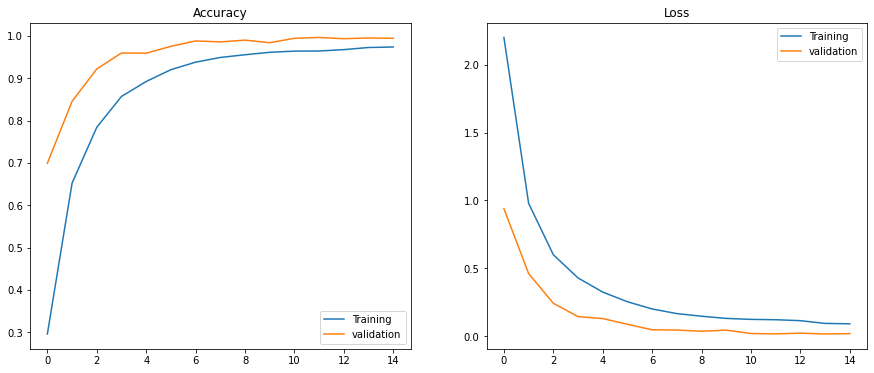

In [37]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
#

**Testing**

In [41]:
y_test[:10]

0     6
1     5
2    10
3     0
4     3
5    21
6    10
7    14
8     3
9     7
Name: label, dtype: int64

In [38]:
preds = model.predict(test_ds)

In [42]:
preds = [np.argmax(i) for i in preds]
preds[:10]

[6, 5, 10, 0, 3, 21, 10, 14, 3, 7]

In [45]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       329
           1       0.98      1.00      0.99       422
           2       0.99      0.95      0.97       325
           3       1.00      0.96      0.98       256
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.91      0.94      0.93       337
           7       0.96      0.89      0.92       466
           8       1.00      0.94      0.97       305
          10       0.96      1.00      0.98       320
          11       1.00      0.98      0.99       213
          12       0.96      0.99      0.98       384
          13       1.00      0.91      0.95       319
          14       0.93      0.99      0.96       231
          15       0.95      1.00      0.98       331
          16       1.00      1.00      1.00       164
          17       0.89      0.83      0.86       154
          18       0.93    

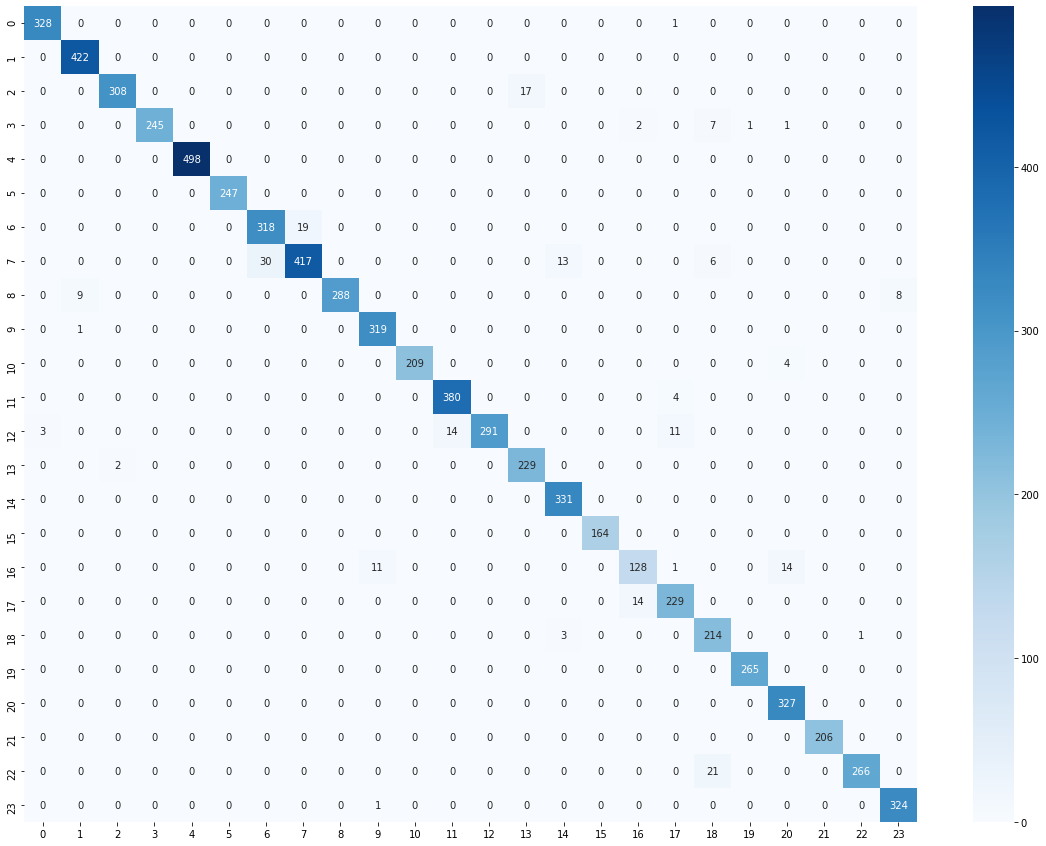

In [48]:
#confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(confusion_matrix(preds,y_test),fmt='d',annot=True,cmap='Blues');

**Visualising Results**

In [49]:
X,Y = next(test_ds)

In [50]:
#plot function
def test_images(images_arr,labels):
    plt.figure(figsize=(15,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images_arr[i])
        plt.xlabel("Actual: {}".format(pred_class[(labels[i])]))
        plt.ylabel("Predicted: {}".format(pred_class[preds[i]]))


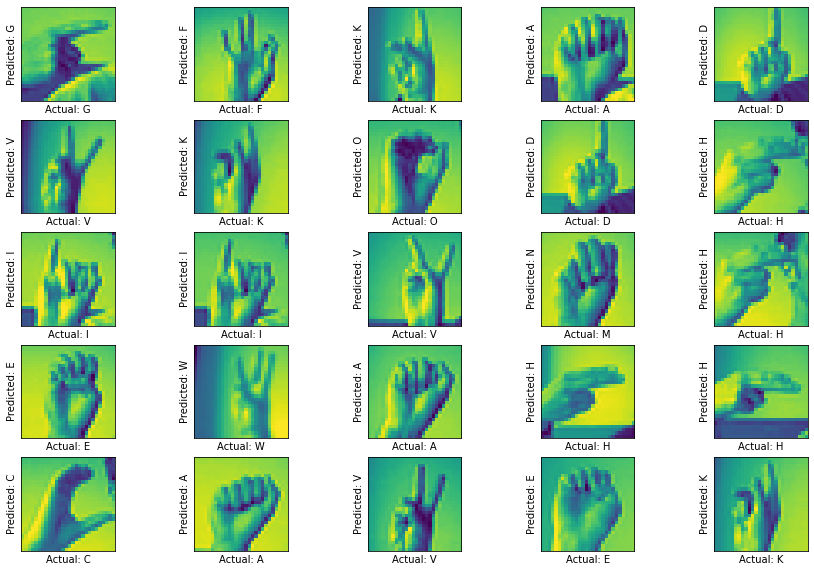

In [52]:
test_images(X,Y)